**Task 1: Importing all libraries**

---



In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from textblob import TextBlob
import geopandas as gpd
from shapely.geometry import Point

**Task 2: Loading the dataset**

---



In [131]:
data = pd.read_csv('/content/airbnb.csv', encoding_errors='ignore')

**Task 3: Data Exploration**

---



In [132]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1.312228e+06,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,20-12-2015,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified
1,4.527754e+07,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,01-05-2023,0.24,139.0,364.0,2.0,No License,4.67,2,1,1
2,9.710000e+17,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,18-12-2023,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1
3,3.857863e+06,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,17-09-2023,1.38,2.0,363.0,12.0,No License,4.64,1,1,1
4,4.089661e+07,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,03-12-2023,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1


In [133]:
data.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
20765,2.473690e+07,Rental unit in New York · ★4.75 · 1 bedroom · ...,186680487,Henry D,Manhattan,Lower East Side,40.711380,-73.991560,Private room,45.0,...,29-09-2023,1.81,1.0,157.0,12.0,No License,4.75,1,1,1
20766,2.835711e+06,Rental unit in New York · ★4.46 · 1 bedroom · ...,3237504,Aspen,Manhattan,Greenwich Village,40.730580,-74.000700,Entire home/apt,105.0,...,01-07-2023,0.48,1.0,0.0,1.0,No License,4.46,1,2,1
20767,5.182527e+07,Rental unit in New York · ★4.93 · 1 bedroom · ...,304317395,Jeff,Manhattan,Hell's Kitchen,40.757350,-73.993430,Entire home/apt,299.0,...,08-12-2023,2.09,1.0,0.0,27.0,No License,4.93,1,1,1
20768,7.830000e+17,Rental unit in New York · ★5.0 · 1 bedroom · 1...,163083101,Marissa,Manhattan,Chinatown,40.713750,-73.991470,Entire home/apt,115.0,...,17-09-2023,0.91,1.0,363.0,7.0,No License,5,1,1,1
20769,5.660000e+17,Rental unit in Queens · ★4.89 · 1 bedroom · 1 ...,93827372,Glenroy,Queens,Rosedale,40.658874,-73.728651,Private room,102.0,...,10-12-2023,4.50,1.0,0.0,62.0,OSE-STRREG-0000513,4.89,1,1,1


In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20770 entries, 0 to 20769
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20770 non-null  float64
 1   name                            20770 non-null  object 
 2   host_id                         20770 non-null  int64  
 3   host_name                       20770 non-null  object 
 4   neighbourhood_group             20770 non-null  object 
 5   neighbourhood                   20763 non-null  object 
 6   latitude                        20763 non-null  float64
 7   longitude                       20763 non-null  float64
 8   room_type                       20763 non-null  object 
 9   price                           20736 non-null  float64
 10  minimum_nights                  20763 non-null  float64
 11  number_of_reviews               20763 non-null  float64
 12  last_review                     

In [135]:
data.shape

(20770, 22)

In [136]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,2.077000e+04,2.077000e+04,20763.000000,20763.000000,20736.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20763.000000,20770.000000
mean,3.033858e+17,1.749049e+08,40.726821,-73.939179,187.714940,28.558493,42.610605,1.257589,18.866686,206.067957,10.848962,1.723592
std,3.901221e+17,1.725657e+08,0.060293,0.061403,1023.245124,33.532697,73.523401,1.904472,70.921443,135.077259,21.354876,1.211993
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,2.707260e+07,2.041184e+07,40.684159,-73.980755,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,4.992852e+07,1.086990e+08,40.722890,-73.949597,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,1.000000
75%,7.220000e+17,3.143997e+08,40.763106,-73.917475,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,1.050000e+18,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


**Task 4: Data Cleaning**

---



In [137]:
data.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,7
latitude,7
longitude,7
room_type,7
price,34


In [138]:
#dropping all the rows with missing values
data.dropna(inplace=True)

In [139]:
data.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [140]:
#dealing with the duplicate rows
data.duplicated().sum()

12

In [141]:
#deleting all the duplicate values
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [142]:
#type casting - changing the data types
data['id'] = data['id'].astype(object)
data.dtypes

data['host_id'] = data['host_id'].astype(object)
data.dtypes

,0
id,object
name,object
host_id,object
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,float64


**EDA**

---------------



**Univariate Analysis**

*   One variable at a time
*   Patterns, trends, and distribution





**Task 5: Data Analysis**

---



<Axes: xlabel='price'>

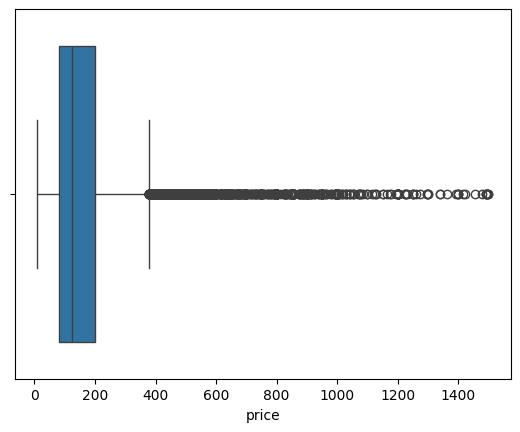

In [143]:
#identifying the outliers in price

df = data[data['price'] < 1500]
sns.boxplot(data=df, x='price')

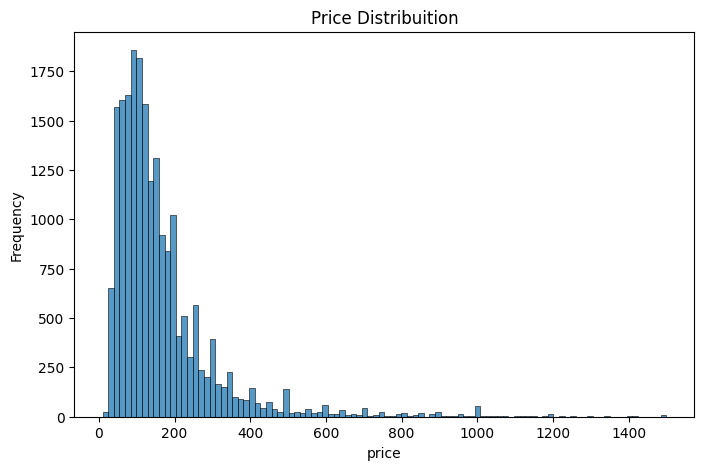

In [144]:
#price distribution

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='price', bins=100)
plt.title('Price Distribuition')
plt.ylabel("Frequency")
plt.show()

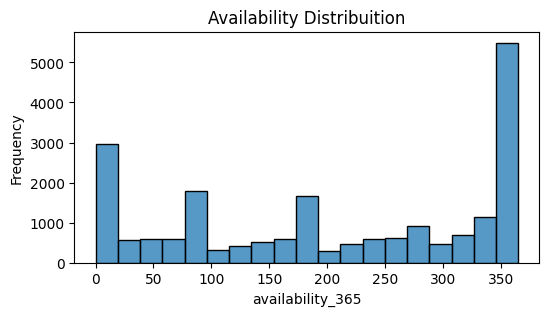

In [145]:
#availability distribution

plt.figure(figsize=(6, 3))
sns.histplot(data=df, x='availability_365')
plt.title('Availability Distribuition')
plt.ylabel("Frequency")
plt.show()

**Bi Variate Analysis**


---


*   Two variables analyzed simultaneously
*   Correlation, dependency, or cause-effect




In [146]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license', 'rating',
       'bedrooms', 'beds', 'baths'],
      dtype='object')

<Axes: xlabel='neighbourhood_group', ylabel='price'>

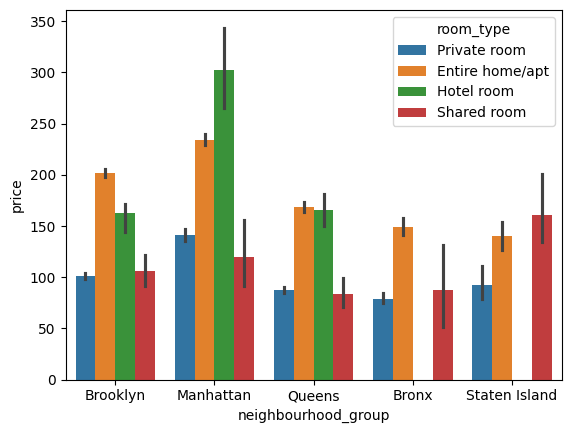

In [147]:
#price dependency on neighbourhood
sns.barplot(data=df, x='neighbourhood_group', y='price', hue='room_type')

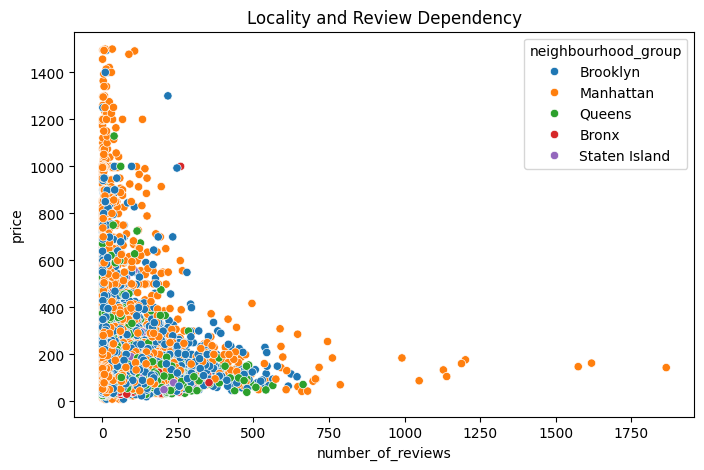

In [148]:
#relation between no. of reviws and price

plt.figure(figsize=(8, 5))
plt.title("Locality and Review Dependency")
sns.scatterplot(data=df, x='number_of_reviews', y='price', hue='neighbourhood_group')
plt.show()

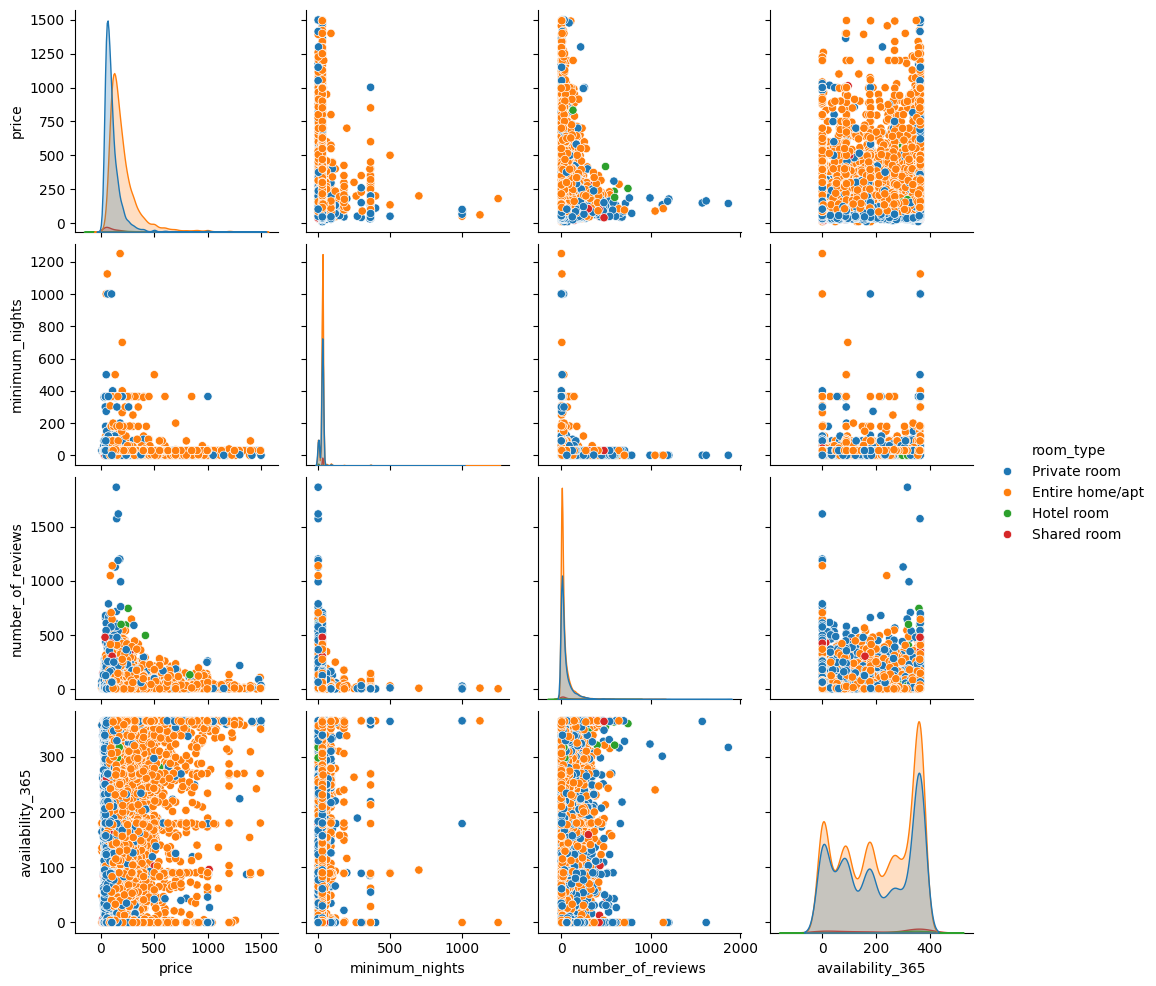

In [149]:
sns.pairplot(data=df, vars=['price', 'minimum_nights', 'number_of_reviews', 'availability_365'], hue='room_type')

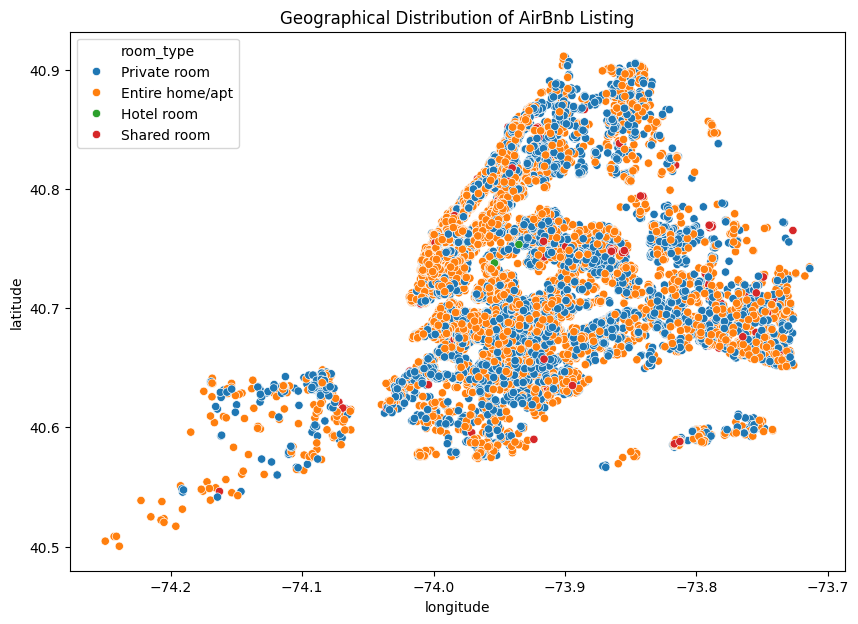

In [150]:
#geographical distributuion of Airbnb

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='room_type')
plt.title("Geographical Distribution of AirBnb Listing")
plt.show()

<Axes: >

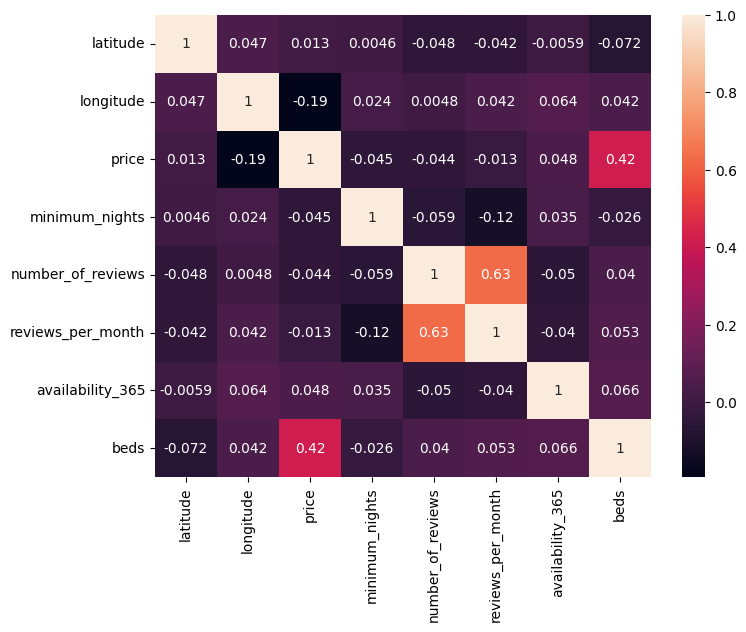

In [151]:
#correaltion of one variable from the other

corr = df[['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'beds']].corr()
corr

plt.figure(figsize=(8, 6))
sns.heatmap(data=corr, annot=True)

**Task 6: Sentimate Analysis**

---



In [152]:
#Sentiment Analysis on Listing Names
def analyze_sentiment(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity

data['name_sentiment'] = data['name'].apply(analyze_sentiment)

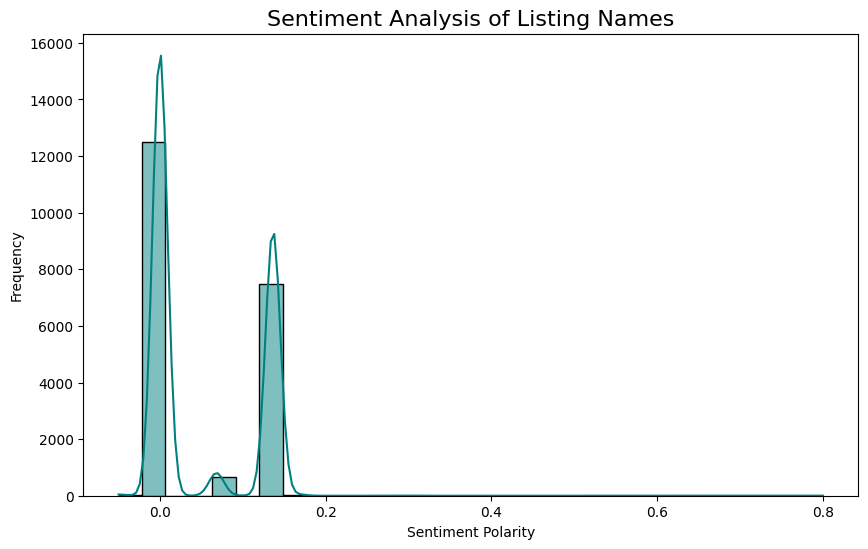

In [153]:
# Visualizing sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['name_sentiment'], kde=True, bins=30, color='teal')
plt.title('Sentiment Analysis of Listing Names', fontsize=16)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


**Task 7: Geospatial Analysis**

---



In [154]:
# Geospatial Clustering of Listings
# Clustering based on price, latitude, and longitude

scaler = MinMaxScaler()
data[['scaled_price', 'scaled_latitude', 'scaled_longitude']] = scaler.fit_transform(data[['price', 'latitude', 'longitude']])

kmeans = KMeans(n_clusters=5, random_state=42)
data['cluster'] = kmeans.fit_predict(data[['scaled_price', 'scaled_latitude', 'scaled_longitude']])


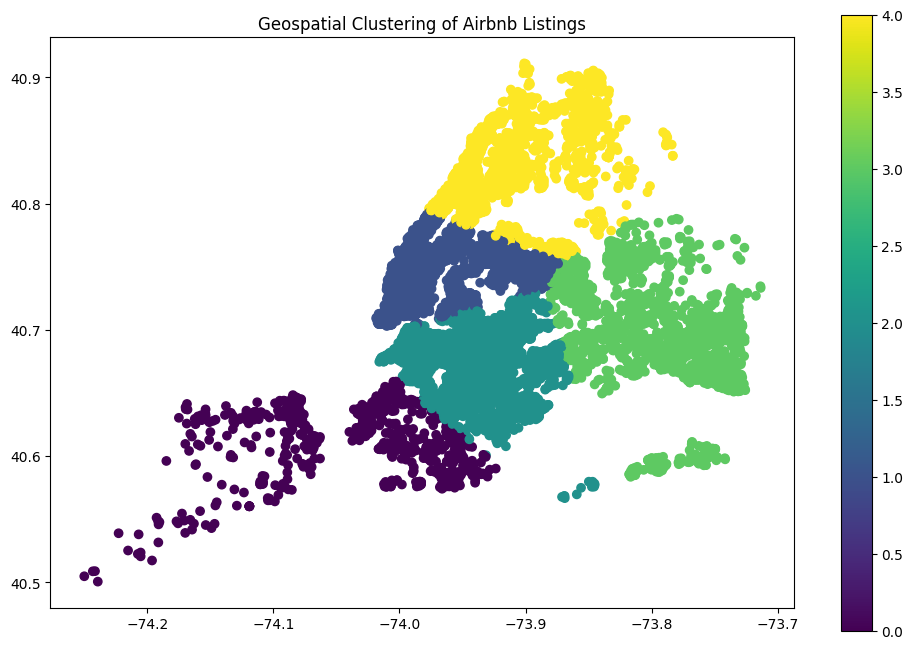

In [155]:
# Plotting clusters on a map
geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
geo_df = gpd.GeoDataFrame(data, geometry=geometry)

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
geo_df.plot(column='cluster', cmap='viridis', legend=True, ax=ax)
plt.title('Geospatial Clustering of Airbnb Listings')
plt.show()


**Insights**


---



In [156]:
# Uncommon Insights**
# Finding neighborhoods with luxury stays
luxury_neighborhoods = data[data['price'] > 500].groupby('neighbourhood_group').agg({'price': 'mean', 'availability_365': 'mean'})
print("Luxury Neighborhoods Insights:\n", luxury_neighborhoods)


Luxury Neighborhoods Insights:
                            price  availability_365
neighbourhood_group                               
Bronx                3039.500000        271.000000
Brooklyn             2033.340659        232.956044
Manhattan            1092.289683        237.805556
Queens               1120.657143        230.085714
Staten Island         694.666667        324.666667


**Word Cloud**


---



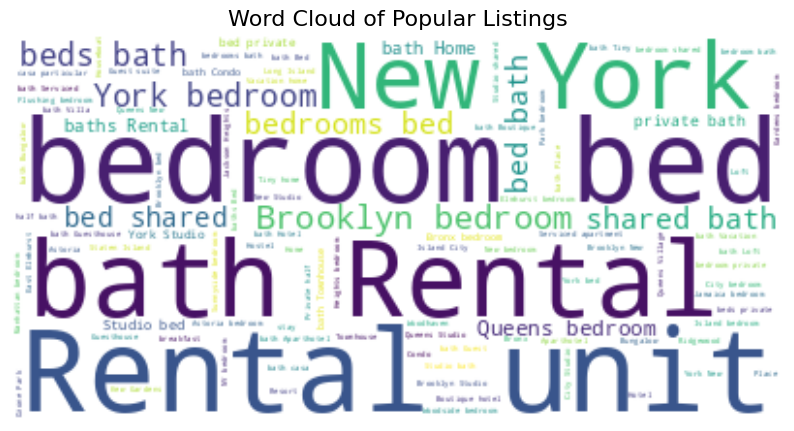

In [157]:
# Word Cloud for popular listings
wordcloud = WordCloud(background_color='white', max_words=100, colormap='viridis').generate(' '.join(data['name']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Popular Listings', fontsize=16)
plt.show()


**Dasboard**


---


*   Dropdown filter: A specific neighbourhood_group to filter
data.
*   Pie Chart: Displays the distribution of room_type for the selected neighbourhood_group.
*   Scatter Plot: Shows the relationship between price and number_of_reviews (filtered by neighbourhood_group).







In [158]:
#importing library for dashboard
!pip install plotly dash

In [159]:
from dash import Dash, html, dcc, Input, Output
import plotly.express as px
import pandas as pd

# Initialize Dash app
app = Dash(__name__)

# App layout
app.layout = html.Div([
    html.H1("Interactive Airbnb Dashboard", style={'textAlign': 'center', 'color': '#1E90FF'}),

    # Dropdown filter for neighbourhood group
    html.Div([
        html.Label("Select Neighbourhood Group:", style={'fontSize': '16px'}),
        dcc.Dropdown(
            id='neighbourhood-group-dropdown',
            options=[
                {'label': group, 'value': group} for group in data['neighbourhood_group'].unique()
            ],
            value=None,  # Default value
            placeholder="Select a neighbourhood group",
            style={'width': '50%'}
        )
    ], style={'margin': '20px'}),

    # Graph for Room Type Distribution
    html.Div([
        dcc.Graph(id='room-type-pie-chart')
    ]),

    # Additional visualization: Price vs Number of Reviews
    html.Div([
        dcc.Graph(id='price-reviews-scatter')
    ]),

    # Div to hold the map plot
    html.Div([
        dcc.Graph(id='map-plot')
    ])
])

# Callbacks to make it interactive
@app.callback(
    [Output('room-type-pie-chart', 'figure'),
     Output('price-reviews-scatter', 'figure'),
     Output('map-plot', 'figure')],  # Output for the map
    [Input('neighbourhood-group-dropdown', 'value')]
)
def update_charts(selected_neighbourhood_group):
    # Filter data based on dropdown selection
    if selected_neighbourhood_group:
        filtered_data = data[data['neighbourhood_group'] == selected_neighbourhood_group]
    else:
        filtered_data = data

    # Update Pie Chart
    room_type_counts = filtered_data['room_type'].value_counts().reset_index()
    room_type_counts.columns = ['room_type', 'count']
    pie_chart = px.pie(
        room_type_counts,
        values='count',
        names='room_type',
        title=f'Distribution of Room Types ({selected_neighbourhood_group or "All"})',
        color_discrete_sequence=px.colors.qualitative.Set2,
        hole=0.4
    )

    # Update Scatter Plot
    scatter_plot = px.scatter(
        filtered_data,
        x='price',
        y='number_of_reviews',
        color='neighbourhood_group',
        title=f'Price vs. Number of Reviews ({selected_neighbourhood_group or "All"})',
        size='reviews_per_month',
        hover_data=['name']
    )

    # Create Map Plot
    map_plot = px.scatter_mapbox(
        filtered_data,
        lat='latitude',
        lon='longitude',
        color='room_type',
        size='price',
        hover_name='name',
        mapbox_style='open-street-map'
    )

    return pie_chart, scatter_plot, map_plot  # Return the map plot

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False)

<IPython.core.display.Javascript object>